In [1]:
%matplotlib inline

#scimap_env4
import glob
import holoviews as hv # viz
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import os
import pandas as pd
import seaborn as sns;
# hv.extension('bokeh') # specify which library for plotting, e.g. 'bokeh' or 'matplotlib'
# hv.extension("bokeh", "matplotlib") 
os.chdir ('/Users/kim/Data/CRUK-OHSU_onedrive final 2022-09-30/Manuscript/IMC-IF method paper/Cell_report_method_resource/github')
matplotlib.use('Qt5Agg')
print('library loaded!')

library loaded!


In [2]:
path = 'Analysis/Oct_2020/feature_merge/feature_merge_CD45_DAPI.csv' 
df=pd.read_csv(path)
len(df)

179970

In [3]:
my_pal = ['mediumblue','crimson','forestgreen']

# Figure 6. Batch effect of IF vs IMC 

In [16]:
%matplotlib inline

Ab= 'CD45IF' 
compareAb ='aSMA'

def scatterplot(df,hue,Ab,compareAb, path=path, log2=False, log10=False, arcsin=False,loggraph=False): 
    
    cols=['CD45IF', 'CD45RO', '191_DNA', '193_DNA','panKt', 'E-Cad', 'CD3', 'CD4', 'CD8a', 'CD20','CD68','aSMA', 'DAPI',]  
    metacol=['cell_id', 'patient', 'diagnosis','ROInum', 'date']
    sns.set(font_scale = 1.5)
    sns.set_style('whitegrid')
    plt.rcParams["figure.figsize"] = (8, 6)   
    plt.rcParams["font.size"] = 8  
    
    df=pd.read_csv(path)      
    X=df[cols]
    
    if arcsin==True: 
        X = (X/5).apply(np.arcsinh)
    else:
        pass
    
    if log2==True: 
        X = X.fillna(0)
        X = X.transform(lambda x: np.log2(x+1))
    else:
        pass 
    
    if log10==True: 
        X = X.fillna(0)
        X = X.transform(lambda x: np.log10(x+1))
    else:
        pass 
    
    metadf=df[metacol]
    df_clean=pd.concat([metadf, X], axis=1)    
    splot=sns.scatterplot(x=Ab, y= compareAb, data=df_clean, hue=hue,alpha=0.1, ec=None, palette=my_pal, s=4) # 
    
    if loggraph==True: 
        splot.set(xscale="log")
    else:
        pass
    
    splot.legend(loc='upper right')
    plt.title(f'{Ab} vs {compareAb}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.savefig(f"Analysis/Oct_2020/batch/{Ab}_{compareAb}_{hue}.png", dpi=300) 
    plt.show()
    print('done')

### IF

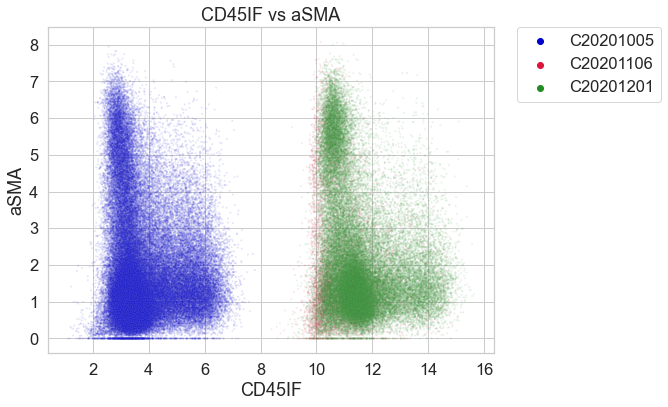

done


In [17]:
scatterplot(df,'date',Ab='CD45IF',compareAb= 'aSMA',path=path, log2=True, log10=False, arcsin=False,loggraph=False)


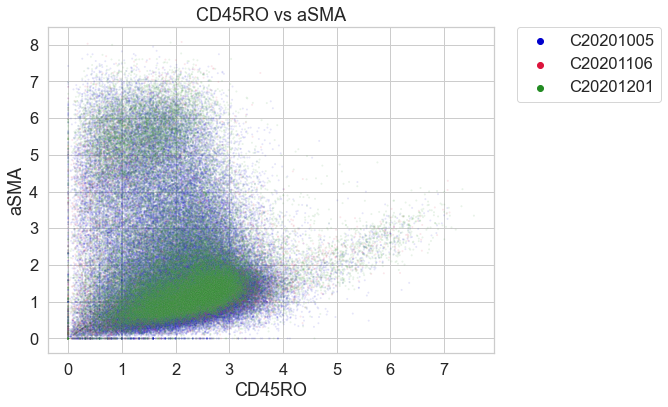

done


In [11]:
scatterplot(df,'date',Ab='CD45RO',compareAb= 'aSMA',path=path, log2=True, log10=False, arcsin=False,loggraph=False)


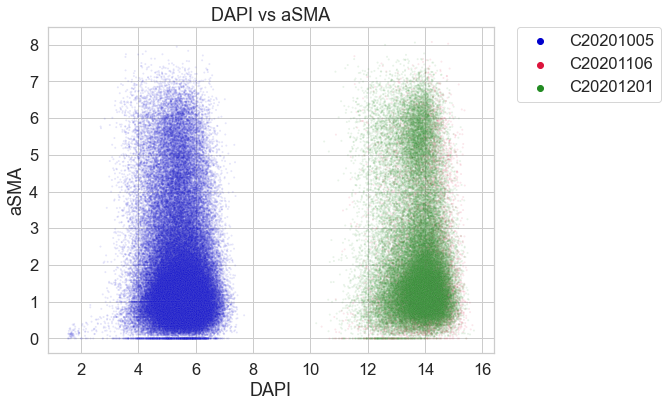

done


In [12]:
scatterplot(df,'date',Ab='DAPI',compareAb= 'aSMA',path=path, log2=True, log10=False, arcsin=False,loggraph=False)


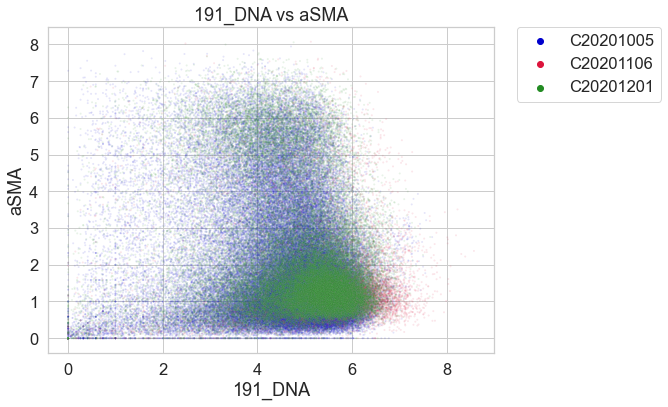

done


In [13]:
scatterplot(df,'date',Ab='191_DNA',compareAb= 'aSMA',path=path, log2=True, log10=False, arcsin=False,loggraph=False)


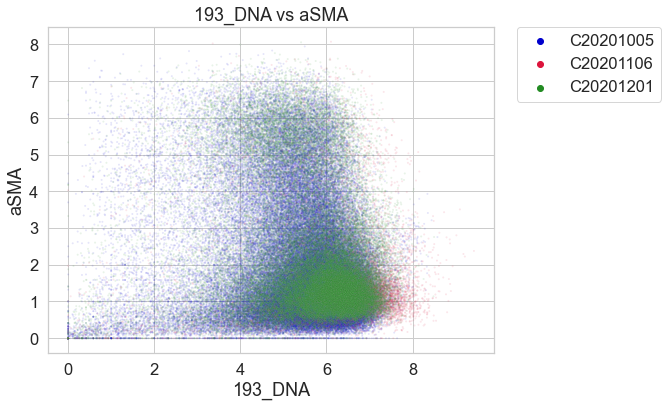

done


In [14]:
scatterplot(df,'date',Ab='193_DNA',compareAb= 'aSMA',path=path, log2=True, log10=False, arcsin=False,loggraph=False)


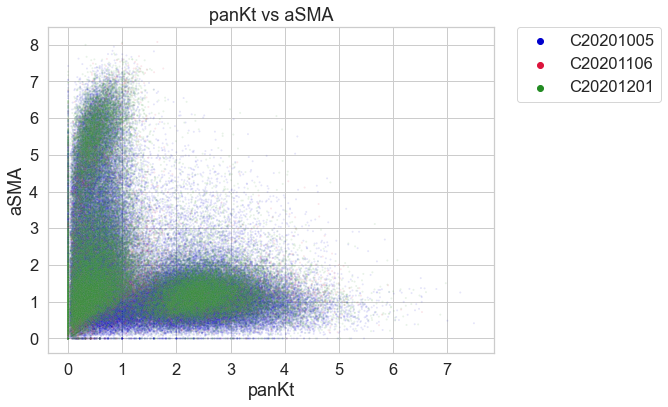

done


In [15]:
scatterplot(df,'date',Ab='panKt',compareAb= 'aSMA',path=path, log2=True, log10=False, arcsin=False,loggraph=False)
